# INHERITANCES 
Classes can inherit the attributes and function.

Child class will inherit the attributes and functions of parent class

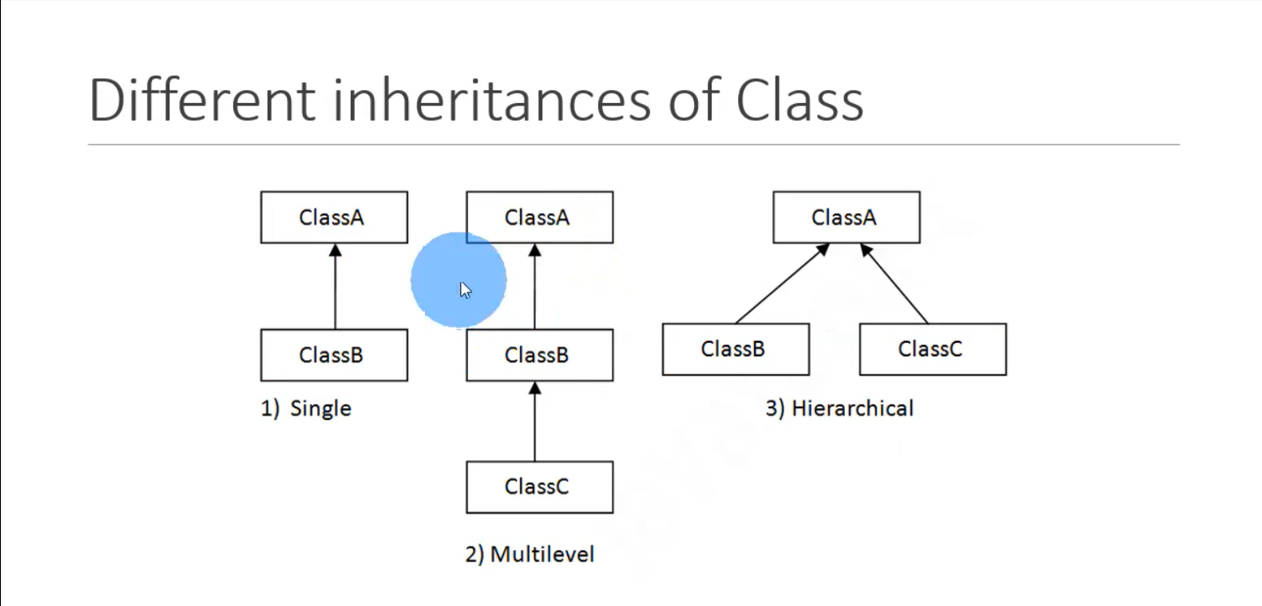

In [1]:
# Single inheritance
class Person:
    def __init__(self, name, age):
        self.name = name 
        self.age = age
    
    def intro(self):
        print(f"My name is {self.name}")
        print(f"I am {self.age} years old")

In [2]:
class Employee(Person):
    def __init__(self, name, age, company):
        super().__init__(name, age)
        self.company = company

    def work(self):
        print(f"I work in {self.company}")

In [3]:
p1 = Person("Ayushi", 23)
print(type(p1))

<class '__main__.Person'>


In [4]:
p1.name

'Ayushi'

In [5]:
p1.age

23

In [6]:
p1.intro()

My name is Ayushi
I am 23 years old


In [7]:
e1 = Employee("Ayushi", 23, "TCS")

In [8]:
e1.name

'Ayushi'

In [9]:
e1.age

23

In [10]:
e1.company

'TCS'

In [11]:
# Intro function is inherited from Parent class
e1.intro()

My name is Ayushi
I am 23 years old


In [12]:
e1.work()

I work in TCS


In [13]:
e1.intro()
e1.work()

My name is Ayushi
I am 23 years old
I work in TCS


In [14]:
# if we pass the worong sequence then we get worng answers
e2 = Employee(78, "Raman", 857)

In [15]:
e2.name

78

In [16]:
e2.age

'Raman'

In [17]:
e2.company

857

In [18]:
e2.intro()
e2.work()

My name is 78
I am Raman years old
I work in 857


In [19]:
# to overcome that we user pydantic library for data validation in class

# Pydantic Library for data validation in class

In [20]:
%pip install pydantic email-validator

Note: you may need to restart the kernel to use updated packages.


Conditions in pydantic
1. ge = greater than or equal to
2. gt = greater than
3. le = less than or equal to 
4. lt = less than 

In [21]:
from pydantic import BaseModel, Field, EmailStr

In [22]:
from typing import Literal

In [23]:
class Student(BaseModel):
    roll_no : int = Field(description="Roll no. of Student",ge = 101)
    name : str = Field(description= "Name of student", min_length=3, max_length=50)
    age : int = Field(description="Age of Student", ge= 18, le= 35)
    email : EmailStr = Field(description="Email of student")
    gender : Literal["Male", "Female"] = Field(description="Gender of the student")
    hobies : list[str] =Field(description="Hobbies of student", default_factory=list)

    def stu_info(self):
        print(f"Roll number of student: {self.roll_no}")
        print(f"Name of student : {self.name}")
        print(f"Age of Student is {self.age}")
        print(f"Email of Student is {self.email}")
        print(f"Gender of student is {self.gender}")
        print(f"Hobbies of Student is/are {self.hobies}")

In [24]:
s1 = Student(
    roll_no=101,
    name= "Ayushi",
    age= 23,
    email= "ayushi@gmail.com",
    gender= "Female",
    hobies=["Travelling", "Eating"]
)

In [25]:
s1

Student(roll_no=101, name='Ayushi', age=23, email='ayushi@gmail.com', gender='Female', hobies=['Travelling', 'Eating'])

In [26]:
print(s1)

roll_no=101 name='Ayushi' age=23 email='ayushi@gmail.com' gender='Female' hobies=['Travelling', 'Eating']


In [27]:
s1.roll_no

101

In [28]:
s1.name

'Ayushi'

In [29]:
s1.age

23

In [30]:
s1.gender

'Female'

In [31]:
s1.email

'ayushi@gmail.com'

In [32]:
s1.stu_info()

Roll number of student: 101
Name of student : Ayushi
Age of Student is 23
Email of Student is ayushi@gmail.com
Gender of student is Female
Hobbies of Student is/are ['Travelling', 'Eating']


In [33]:
s2 = Student(
    roll_no= 102,
    name = "Pranay",
    age =23,
    email = "NotAvailable",
    gender='Male',
    hobies=["Reading", "Playing"]
    )

ValidationError: 1 validation error for Student
email
  value is not a valid email address: An email address must have an @-sign. [type=value_error, input_value='NotAvailable', input_type=str]

In [ ]:
# s2 object is not created

s2

NameError: name 's2' is not defined

In [ ]:
# converting s1 object into dictionaty
d = s1.model_dump()

In [ ]:
d

{'roll_no': 101,
 'name': 'Ayushi',
 'age': 23,
 'email': 'ayushi@gmail.com',
 'gender': 'Female',
 'hobies': ['Travelling', 'Eating']}

In [ ]:
d["roll_no"]

101

In [ ]:
d["age"]

23

In [ ]:
d["email"]

'ayushi@gmail.com'

In [ ]:
d["gender"]

'Female'

In [ ]:
d["hobies"]

['Travelling', 'Eating']

In [ ]:
d["name"]

'Ayushi'

# Multiple Inheritance
Multiple Parent class can be inherited

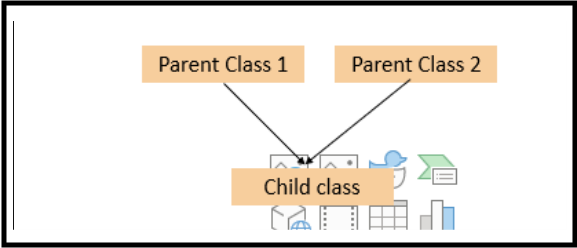

In [43]:
class BaseSalary:

    def __init__(self, base_sal):
        self.base_sal = base_sal

    def get_base_salary(self):
        return self.base_sal 

In [44]:
class Bonus:

    def __init__(self, per_bonus):
        self.per_bonus = per_bonus

    def calculate_bonus(self, base_sal):
        bonus = (self.per_bonus / 100) * base_sal
        return bonus

In [45]:
class TotalSalary(BaseSalary, Bonus):

    def __init__(self, base_sal, per_bonus):
        BaseSalary.__init__(self, base_sal)
        Bonus.__init__(self, per_bonus)

    def get_total_salary(self):
        bonus = self.calculate_bonus(self.base_sal)
        total_sal = self.base_sal + bonus
        return total_sal

In [46]:
sal1 = Total_sal(base_sal=50000, per_bonus= 20)

In [47]:
type(sal1)

__main__.Total_sal

In [48]:
sal1.get_base_sal()

50000

In [50]:
sal1.calculate_bonus(sal1.base_sal)

10000.0

In [51]:
sal1.get_total_sal()

60000.0

In [52]:
sal2 = TotalSalary(base_sal= 38000, per_bonus= 12.5)
type(sal2)

__main__.TotalSalary

In [53]:
sal2.get_base_salary()

38000

In [56]:
sal2.calculate_bonus(sal2.base_sal)

4750.0

In [57]:
sal2.get_total_salary()

42750.0

#Multilevel Inheritance

In [58]:
class Emp:
    
    def __init__(self, emp_id, name):
        self.emp_id = emp_id
        self.name = name 
    
    def get_emp_details(self):
        print(f"Employee Id = {self.emp_id}, Employee Name = {self.name}")

In [59]:
class Manager(Emp):

    def __init__(self, emp_id, name, department):
        super().__init__(emp_id, name)
        self.department = department
    
    def get_manager_details(self):
        print(f"Department : {self.department}")

In [60]:
class ProjectManager(Manager):
    def __init__(self, emp_id, name, department, project):
        super().__init__(emp_id, name, department)
        self.project = project
    
    def get_projectManager_info(self):
        print(f"Project = {self.project}")

In [61]:
e1 = ProjectManager(emp_id= 1009, name= "Pranay", department= "Electrical", project="SMS" )

In [62]:
type(e1)

__main__.ProjectManager

In [63]:
e1.emp_id

1009

In [64]:
e1.name

'Pranay'

In [65]:
e1.get_emp_details()

Employee Id = 1009, Employee Name = Pranay


In [66]:
e1.department

'Electrical'

In [67]:
e1.get_manager_details()

Department : Electrical


In [68]:
e1.project

'SMS'

In [69]:
e1.get_projectManager_info()

Project = SMS


In [70]:
e1.get_emp_details()
e1.get_manager_details()
e1.get_projectManager_info()

Employee Id = 1009, Employee Name = Pranay
Department : Electrical
Project = SMS


#  Hierarchial Inheritance 

1 parent class but multiple child class

In [71]:
class User:

    def __init__(self, username, email):
        self.username =  username
        self.email = email

    def get_user_info(self):
        print(f"Username :{self.username}, Email: {self.email}")

In [72]:
# child one 
class Admin(User):
    def __init__(self, username, email, access):
        super().__init__(username, email)
        self.access = access

    def get_access_info(self):
        print(f"Access: {self.access}")

In [73]:
# child two 
class RegUser(User):
    def __init__(self, username, email, sub):
        super().__init__(username, email)
        self.sub = sub

    def get_sub_info(self):
        print(f"Subsctription Interval: {self.sub}")

In [74]:
u1 = User(username= "Ayushi", email="ayushi@gmail.com")

In [75]:
u1.username

'Ayushi'

In [76]:
u1.email

'ayushi@gmail.com'

In [78]:
u1.get_user_info()

Username :Ayushi, Email: ayushi@gmail.com


In [79]:
u2 = Admin(username= "Pranay", email= "pranay@gmail.com", access= "Edit wedsite")

In [80]:
u2.username

'Pranay'

In [81]:
u2.email

'pranay@gmail.com'

In [83]:
u2.access

'Edit wedsite'

In [86]:
u2.get_user_info()
u2.get_access_info()

Username :Pranay, Email: pranay@gmail.com
Access: Edit wedsite


In [91]:
u2.get_sub_info()

AttributeError: 'Admin' object has no attribute 'get_sub_info'

In [87]:
u3 = RegUser(username="Pradutt", email="pradutt@gmail.com", sub= "12 Months")

In [88]:
u3.username

'Pradutt'

In [89]:
u3.email

'pradutt@gmail.com'

In [90]:
u3.get_user_info()
u3.get_sub_info()

Username :Pradutt, Email: pradutt@gmail.com
Subsctription Interval: 12 Months


In [92]:
u3.get_access_info()

AttributeError: 'RegUser' object has no attribute 'get_access_info'